In [ ]:
!pip install scikit-learn==0.24.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for scikit-learn (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects


In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


In [20]:
#LOADING THE DATA SET

x=pd.read_csv('/content/training_set_features.csv')

x_test=pd.read_csv('/content/test_set_features.csv')

r=x_test['respondent_id']

y= pd.read_csv('/content/training_set_labels.csv')

x.set_index('respondent_id', inplace=True)
x_test.set_index('respondent_id', inplace=True)
y.set_index('respondent_id', inplace=True)

dropcolumns=['health_insurance','employment_industry','employment_occupation','rent_or_own','race','marital_status','hhs_geo_region']
#,'marital_status','rent_or_own','hhs_geo_region','census_msa'

x = x.drop(columns=dropcolumns)
x_test=x_test.drop(columns=dropcolumns)
x_test.shape

(26708, 28)

In [3]:
x_test.isnull().sum()

xyz_concern                      85
xyz_knowledge                   122
behavioral_antiviral_meds        79
behavioral_avoidance            213
behavioral_face_mask             19
behavioral_wash_hands            40
behavioral_large_gatherings      72
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
age_group                         0
education                      1407
sex                               0
income_poverty                 4497
employment_status              1471
census_msa                        0
household_adults                225
household_children          

In [13]:
y1=y.iloc[:,0]
y2=y['seasonal_vaccine']
y2.head()

respondent_id
0    0
1    1
2    0
3    1
4    0
Name: seasonal_vaccine, dtype: int64

In [5]:
#SEPARATED OUT THE FEATURES BASED ON ORDINAL, CATEGORICAL, BINARY VALUES STORED IN THEM

o_features=['xyz_concern','xyz_knowledge','opinion_xyz_vacc_effective','opinion_xyz_risk','opinion_xyz_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc']

#1 c_features=['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','household_adults','household_children','employment_industry','employment_occupation']
#2 c_features=['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','household_adults','household_children']
#c_features=['age_group','education','race','sex','income_poverty','marital_status','employment_status','hhs_geo_region','census_msa','household_adults','household_children']
c_features=['age_group','education','sex','income_poverty','employment_status','census_msa','household_adults','household_children']

b_features=['behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','doctor_recc_xyz','doctor_recc_seasonal','chronic_med_condition','child_under_6_months','health_worker']
print(len(o_features)+len(c_features)+len(b_features))

28


In [25]:
#PRE PROCESSING THE DATA
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
x_test[c_features] = ordinal_encoder.fit_transform(x_test[c_features])

imputer = SimpleImputer(strategy='most_frequent')

x_test[b_features] = imputer.fit_transform(x_test[b_features])

imputer2 = SimpleImputer(strategy='median')

x_test[o_features] = imputer2.fit_transform(x_test[o_features])

imputer3= SimpleImputer(strategy='most_frequent')

x_test[c_features] = imputer3.fit_transform(x_test[c_features])


In [24]:
#PRE PROCESSING THE DATA
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
x[c_features] = ordinal_encoder.fit_transform(x[c_features])

imputer = SimpleImputer(strategy='most_frequent')

x[b_features] = imputer.fit_transform(x[b_features])

imputer2 = SimpleImputer(strategy='median')

x[o_features] = imputer2.fit_transform(x[o_features])

imputer3= SimpleImputer(strategy='most_frequent')

x[c_features] = imputer3.fit_transform(x[c_features])


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [32]:
#6
from sklearn.naive_bayes import GaussianNB
#0.71,0.74
model6 = GaussianNB()
model6.fit(x,y1)
y_pred11 = model6.predict_proba(x_test)
model6.fit(x,y2)
y_pred2 = model6.predict_proba(x_test)

#2 0.68, 0.78
model= LogisticRegression(max_iter=2000)
model.fit(x,y1)
y_pred1 = model.predict_proba(x_test)
model.fit(x,y2)
y_pred22 = model.predict_proba(x_test)
y_pred22= y_pred22[:,1]
y_pred11 =  y_pred11[:,1]
print(y_pred11.shape)
print(y_pred22.shape)
print(r.shape)

(26708,)
(26708,)
(26708,)


In [35]:
dataset= {
    'respondent_id': r,
    'h1n1_vaccine': y_pred11,'seasonal_vaccine': y_pred22
}
df = pd.DataFrame(dataset)


df.to_csv('predictions.csv', index=False)
df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.022429,0.275809
1,26708,0.000124,0.062143
2,26709,0.953668,0.657907
3,26710,0.313544,0.865216
4,26711,0.994614,0.519268


In [ ]:
#2 0.68, 0.78
model= LogisticRegression(max_iter=2000)
model.fit(x,y1)
y_pred1 = model.predict(x_test)
model.fit(x,y2)
y_pred22 = model.predict(x_test)

In [ ]:
#1
#0.69, 0.78
from sklearn.ensemble import GradientBoostingClassifier

model2 = GradientBoostingClassifier()
model2.fit(X_train,y1)
y_pred1 = model2.predict(X_test)
print(accuracy_score(y1t, y_pred1))
model2.fit(X_train,y2)
y_pred2 = model2.predict(X_test)
print(accuracy_score(y2t, y_pred2))


0.8377636340945963
0.7857231998003245


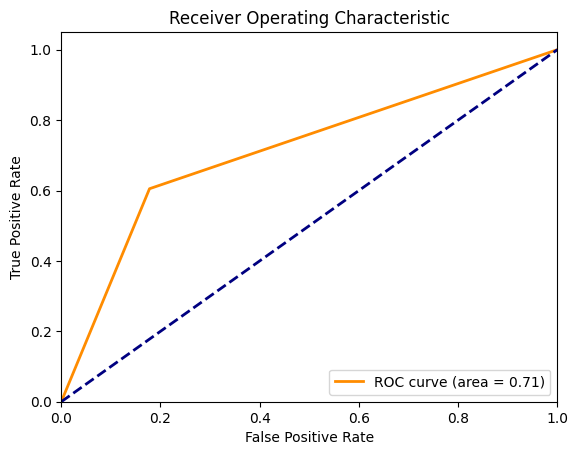

AUC: 0.71


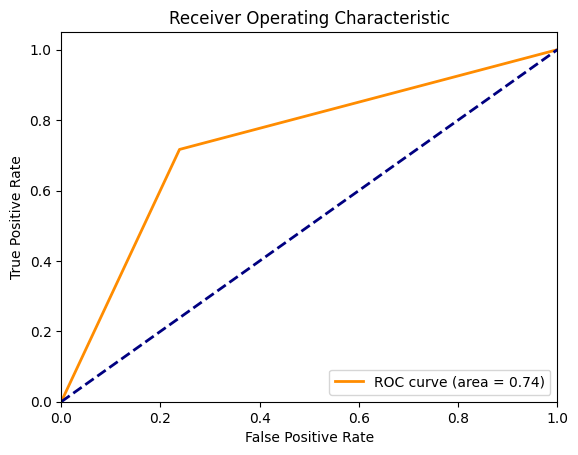

AUC: 0.74


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y1t, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
print(f'AUC: {roc_auc:.2f}')

fpr, tpr, thresholds = roc_curve(y2t, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
print(f'AUC: {roc_auc:.2f}')




In [ ]:
#3 0.67,0.78
from sklearn.svm import SVC

model4 = SVC()
model4.fit(X_train,y1)
y_pred1 = model4.predict(X_test)
print(accuracy_score(y1t, y_pred1))
model4.fit(X_train,y2)
y_pred2 = model4.predict(X_test)
print(accuracy_score(y2t, y_pred2))


0.8372644452764259
0.7858479970048671


In [ ]:
#4
#0.68, 0.77
from xgboost import XGBClassifier

model3 = XGBClassifier()
model3.fit(X_train,y1)
y_pred1 = model3.predict(X_test)
print(accuracy_score(y1t, y_pred1))
model3.fit(X_train,y2)
y_pred2 = model3.predict(X_test)
print(accuracy_score(y2t, y_pred2))

0.8246599276176214
0.7716211156870086
